# Human activity recognition based on data from mobile sensors

**Purpose of the work:** It is necessary to predict human activity by six classes of movements using data from mobile sensors using applied machine learning algorithms:
* Moves in a straight line
* Moves upwards (e.g., moving up stairs)
* Moves downward (for example, moving down the stairs)
* Sits
* Standing
* Lays down


## 1. Information about the dataset.
The dataset contains recordings of smartphone sensors (accelerometer and gyroscope with a sampling rate of 50 Hz) from 30 participants performing the following actions: walking, stair walking, stair walking, sitting, standing, and lying down. The data were preprocessed using noise filters. The data set was presented by Jorge L. Reyes-Ortiz.

Signs were extracted from 3 axis raw tAcc-XYZ and tGyro-XYZ accelerometer and gyro signals. These signals were taken at a constant frequency of 50 Hz. They were then filtered using a median filter and a 3rd order low-pass Butterworth filter at 20 Hz to remove noise. Similarly, the acceleration signal was divided into body and gravity acceleration signals (`tBodyAcc-XYZ` and `tGravityAcc-XYZ`) using another low-pass Butterworth filter with an angular frequency of 0.3 Hz. Linear acceleration of the body and angular velocity were used to obtain "jerk" signals - (`tBodyAccJerk-XYZ` and `tBodyGyroJerk-XYZ`). Also the value of these three-dimensional signals was calculated using the Euclidean norm - (`tBodyAccMag`, `tGravityAccMag`, `tBodyAccJerkMag`, `tBodyGyroMag`, `tBodyGyroJerkMag`). 


Finally, a fast Fourier transform (FFT) was applied to some of these signals, resulting in `fBodyAcc-XYZ`, `fBodyAccJerk-XYZ`, `fBodyGyro-XYZ`, `fBodyAccJerkMag`, `fBodyGyroMag`, `fBodyGyroJerkMag`. (Note the "f" for signals in the frequency domain). 

The set of variables that were estimated from these signals is as follows: 
* mean(): Mean().
* std(): Standard deviation.
* mad(): Mean absolute deviation 
* max(): Highest value in the array
* min(): The smallest value in the array
* sma(): The area of the signal value
* energy(): A measure of energy. Sum of squares divided by the number of values. 
* iqr(): Interquartile range. 
* entropy(): Entropy of the signal
* arCoeff(): Autoregression coefficients with Burg order equal to 4
* correlation(): correlation coefficient between two signals
* maxInds(): frequency component index with the highest value
* meanFreq(): weighted average value of frequency components to get the average frequency
* skewness(): skewness of the signal in the frequency domain 
* kurtosis(): the excess of the signal in the frequency domain 
* bandsEnergy(): Energy of the frequency interval within 64 bins of each FFT window.
* angle(): The angle between the vectors.


## 2. Importing libraries
The first thing we do is import the necessary libraries to work with the data:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd

## 3. Read the dataset

In applied machine learning tasks, feature extraction is a very important process in which data is interpreted into informative features. This process can also be called feature engineering, which is a very time-consuming and creative task. For the purposes of this paper, we will omit this part and use the pre-processed data. 

In [3]:
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

df = read_data('/content/drive/MyDrive/Fall semester 2022/AI', 'train.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### Dataset info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


Here we see that our data has 7352 pairs of data points, label and index, marked from 0 to 7351. Including 563 columns, of which 562 columns are considered data points, and the last column "Activity" is its label. The data type is of two types, of which the 562 columns are numeric and the label is a categorical type.

### Unique labels

In [5]:
# Show all lable of dataset
df.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

### Check balance dataset

In [6]:
pd.crosstab(index=df.Activity, columns='count')

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


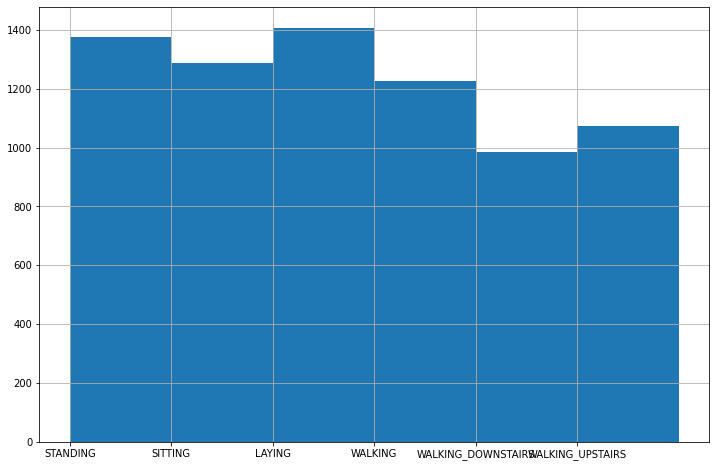

In [7]:
import matplotlib.pyplot as plt
df['Activity'].hist( figsize=(12, 8), bins=np.arange(0,7))
plt.show()

Note that the data is not too unbalanced. This is an important factor that affects the performance of the model.

### Scale data

In [8]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


We can easily see that the columns get the equivalent interval [-1,1], so we can skip this step.

### Split dataset

Now, load the complete data set and store it under the following four variables:

* `train_X`: traits used to train the model
* `train_y`: traits used to train the model
* `test_X`: traits used to test the model
* `test_y`: labels used to test the model

In [9]:
def load_dataset(label_dict, dataset_dir):
    train_X = read_data(dataset_dir, 'train.csv').values[:,:-2]
    train_y = read_data(dataset_dir, 'train.csv')['Activity']
    train_y = train_y.map(label_dict).values
    test_X = read_data(dataset_dir, 'test.csv').values[:,:-2]
    test_y = read_data(dataset_dir, 'test.csv')
    test_y = test_y['Activity'].map(label_dict).values # map categorical values 
    return(train_X, train_y, test_X, test_y)

label_mapping = {
              'WALKING':            0,
              'WALKING_UPSTAIRS':   1,
              'WALKING_DOWNSTAIRS': 2, 
              'SITTING':            3, 
              'STANDING':           4, 
              'LAYING':             5,
              }

train_X, train_y, test_X, test_y = load_dataset(label_mapping, '/content/drive/MyDrive/Fall semester 2022/AI')

In [10]:
train_X

array([[0.28858451, -0.020294171, -0.13290514, ..., -0.84124676,
        0.17994061, -0.058626924],
       [0.27841883, -0.016410568, -0.12352019, ..., -0.8447876,
        0.18028889, -0.054316717],
       [0.27965306, -0.019467156, -0.11346169, ..., -0.84893347,
        0.18063731, -0.049117815],
       ...,
       [0.27338737, -0.017010616, -0.045021828, ..., -0.77913261,
        0.24914484, 0.040811188],
       [0.28965416, -0.018843044, -0.15828059, ..., -0.78518142,
        0.24643223, 0.025339478],
       [0.35150347, -0.012423118, -0.20386717, ..., -0.78326693,
        0.24680852, 0.036694843]], dtype=object)

In [11]:
train_y

array([4, 4, 4, ..., 1, 1, 1])

## 4. Selecting a model

Import your chosen model from the `sklearn` library and initialize it into a `model` object:

You should also select **few** ML models to compare your results.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


names = [
    'KNN',
    'Logistic_Regression',
    'SVC',
]

classifiers = [
]


### K-Nearest Neighbour (KNN)

Suppose we want to get an estimate of 8 data points around an input point, then choose `n_neighbors = 8`.

For `weight`, if `uniform` is chosen, the points in the area containing 8 neighbors will be considered equally important or equally weighted. In this case, I want my closest people to be ''best friends'' or the closest neighbors of the query point will have more influence than the neighbors that are farther away.
$$w_i = \exp \left( \frac{-||\mathbf{x} - \mathbf{x}_i||_2^2}{\sigma^2} \right)$$

Specify to calculate the distance as the Euclidean distance $\ell_2$, so `p = 2`.

In [13]:
def myweight(distances):
    sigma2 = .5 
    return np.exp(-distances**2/sigma2)

classifiers.append(
    KNeighborsClassifier(
        n_neighbors = 8,
        weights = myweight,
        p = 2
        )
    )

### Logistic Regression

In the case of multiple classes, the learning algorithm uses a one-vs-rest (OvR) scheme if `multi_class` is set to `ovr`, and uses a cross-entropy loss if `multi_class` is set to `multinomial`. 

Our goal in this problem is to minimize this loss function:
 
$$ \min_W -C \sum_{i=1}^n \sum_{k=0}^{K-1} [y_i = k] \log(\hat{p}_k(X_i)) + r(W). $$

The $r(W)$ part is given through the `penalty` parameter. I chose the norm $\ell_2 = \frac{1}{2}\|W\|_F^2 = \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^ { K} W_{i,j}^2$. Why is it squared and norm 2 is $\|W\|_F$? It eliminates the square
root; it's easier to work mathematically.

According to `multinomial` for cross-entropy loss and l2 regularization for `penalty`, sklearn gives us Solver `solver` respectively `lbfgs`, `newton-cg`, ``sag` and `saga`.

The parameter `class_weight` là `balanced` because I want to adjust the weights inversely to the frequencies of the classes in the input data as `n_samples/(n_classes * np.bincount(y))`.


In [14]:
classifiers.append(
    LogisticRegression(
        multi_class = 'multinomial',
        penalty = 'l2',
        solver = 'lbfgs',
        class_weight = 'balanced'
        )
    )

### C-Support Vector Classification

Multi-class support is done in a one-vs-one scheme.

I would like to use a kernel similar to the one I created with my own weight function in the KNN task. Therefore, I recommend the RBF kernel function.

RBF: $$w_i = \exp \left( \frac{-|||\mathbf{x}_i||_2^2}{2\sigma^2} \right) = \exp(-\gamma \|x-x'\|^2)$$

Intuitively, the `gamma` parameter determines how far the influence of a single training example extends, with low values meaning "far away" and high values meaning "close". The `gamma` parameters can be seen as the inverse of the influence radius of the samples chosen by the model as reference vectors.

The parameter `C` compensates for the correct classification of training samples by maximizing the stock of the solver function. For larger values of `C`, a smaller margin will be taken if the solver function is better at correctly classifying all training points. A lower `C` will contribute to a larger margin, hence a simpler decision function at the expense of learning accuracy. In other words, `C` behaves like a regularization parameter in SVM.


In [15]:
classifiers.append(
    SVC(
        kernel = 'rbf',
        C = 1000,
        gamma = 0.001,
        )
    )

## 5. Training the model

Train the model using the features from the training set (`train_X`) and the labels as the ground truth (`train_y`).

In [16]:
models = dict(zip(names, classifiers))

Fit each model with train dataset

In [17]:
for model in models.values():
  # print(model)
  model.fit(train_X, train_y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
print(model)

SVC(C=1000, gamma=0.001)


## 6. Model evaluation
Use the trained model to predict motion activity using the features from the test set (`test_X`). Store the predictions in the `yhat` list.

In [19]:
predictions = {}

for name, model in models.items():
  predictions[name] = model.predict(test_X)

In [20]:
predictions['Logistic_Regression']

array([4, 4, 4, ..., 1, 1, 1])

Output a classification report comparing the predictions (`yhat`) with the ground truth (`test_y`).

What is the difference between the `precision` and `recall` scores? What is the `F1` indicator?

The system's Precision within a class is the proportion of documents that really belong to that class relative to all documents that the system has assigned to that class. 
$$\text{precision} = \frac{tp}{tp + fp},$$

System completeness (Recall) is a fraction of documents found by the classifier belonging to the class with respect to all documents of this class in the test sample.
$$\text{recall} = \frac{tp}{tp + fn},$$

The F-measure (F1) is a harmonic mean between accuracy and completeness. It tends to zero if precision or completeness tends to zero.
$$F_1 = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}.$$

Try several hyperparameters and several models. Compare the results.

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = label_mapping.keys()

model_reports = {} #{name : [classification_report, confusion_matrix]}

for name, prediction in predictions.items():
  multi_score_report = classification_report(test_y, prediction, target_names=target_names)
  conf_max = confusion_matrix(test_y, prediction)
  model_reports[name] = {
      'classification_report': multi_score_report,
      'confusion_matrix': conf_max}


Let's look at the scores in the report for each type of model

In [22]:
for name, report in model_reports.items():
  print(f"{name} multi score report:")
  print(report['classification_report'])
  print("\n")

KNN multi score report:
                    precision    recall  f1-score   support

           WALKING       0.85      0.96      0.90       496
  WALKING_UPSTAIRS       0.89      0.89      0.89       471
WALKING_DOWNSTAIRS       0.91      0.77      0.84       420
           SITTING       0.84      0.81      0.82       491
          STANDING       0.83      0.86      0.85       532
            LAYING       1.00      0.99      1.00       537

          accuracy                           0.89      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.89      0.88      2947



Logistic_Regression multi score report:
                    precision    recall  f1-score   support

           WALKING       0.95      0.99      0.97       496
  WALKING_UPSTAIRS       0.97      0.94      0.95       471
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90 

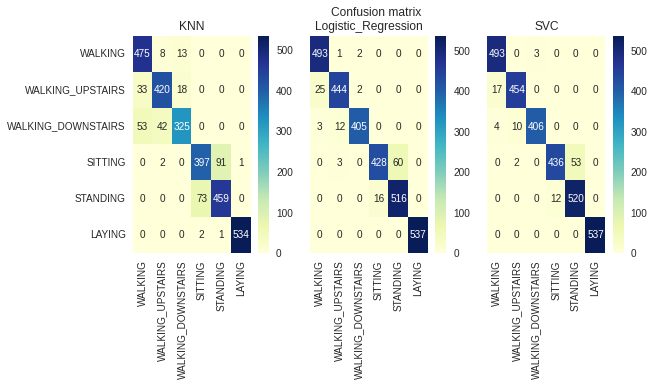

In [23]:
import seaborn as sns
plt.style.use('seaborn')

fig, axs = plt.subplots(1,3,  figsize=(9, 4), sharey = True)
axs[0].get_shared_y_axes().join(axs[1],axs[2])
for i in np.arange(3):  
  df_cm  = pd.DataFrame(model_reports[names[i]]['confusion_matrix'],
                        index = target_names,
                        columns = target_names)
  g = sns.heatmap(df_cm,cmap="YlGnBu",cbar=True,ax=axs[i], annot=True, fmt="")
  g.set_title(names[i])
  g.set_ylabel('')
  g.set_xlabel('')
  g.set_animated
plt.suptitle('Confusion matrix')
plt.show()

Looking at all the models trained with this dataset, the results are very good. But for SVC and Logistic_Regression there is a significant difference in F1 scores. Perhaps I really didn't choose the best K for the KNN model, while for the other two models I chose the best kernel function for SVC and the best functions in Logistic Regression.

An experience I learned online: "Typically, machine learning experts suggest trying logistic regression first to see how the model works. SVM with a linear kernel) or try using KNN. Logistic regression and SVM with a linear kernel have the same performance, but one may be more powerful than the other, depending on your features."